**1. Load and Inspect Data**




In [1]:
import pandas as pd
import numpy as np

train_data = pd.read_csv('/kaggle/input/ueba-dbscan-iforest/train_data.csv', encoding='latin1')

print("Train Data Shape:", train_data.shape)

print(train_data.head())


Train Data Shape: (528690, 10)
   id            account         group              IP  \
0   1  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ    192.168.1.50   
1   2  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ   192.168.31.46   
2   3  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ     192.168.2.3   
3   4  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ  192.168.145.30   
4   5  xiaojiawei@qq.com  ÈËÊÂÐÐÕþÖÐÐÄ  192.168.178.92   

                               url   port  vlan      switchIP            time  \
0                http://123.6.4.41  15788   700  129.30.06.37  2021/6/16 7:56   
1           http://104.192.108.154  12665   700  152.91.89.45  2021/6/28 7:58   
2              http://42.236.37.80  25551   700  129.30.06.37   2021/6/1 6:37   
3  http://uf-api6-client.ksord.com  18274   700    162.6.8.29   2021/5/5 8:18   
4           http://101.199.128.170  34572   700    162.0.1.84  2021/6/20 6:52   

      ret  
0  0.1149  
1  0.1801  
2  0.3690  
3  0.1532  
4  0.1449  


In [2]:
print("Total observations:", len(train_data))
print("Unique accounts:", train_data['account'].nunique())
print("Unique IPs:", train_data['IP'].nunique())
print("Unique URLs:", train_data['url'].nunique())
print("Unique switchIPs:", train_data['switchIP'].nunique())

Total observations: 528690
Unique accounts: 151
Unique IPs: 133
Unique URLs: 1319
Unique switchIPs: 133


In [3]:
# Convert 'time' column to datetime and sort by time
train_data['time'] = pd.to_datetime(train_data['time'])
train_data = train_data.sort_values(by='time')


In [4]:
# Temporal range of the dataset
start_time = train_data['time'].min()
end_time = train_data['time'].max()


In [5]:
print(f"First observation: {start_time}\nLatest observation: {end_time}")
print("Total observations:", len(train_data))
print("Unique accounts:", train_data['account'].nunique())
print("Unique IPs:", train_data['IP'].nunique())
print("Unique URLs:", train_data['url'].nunique())
print("Unique switchIPs:", train_data['switchIP'].nunique())

First observation: 2021-04-30 18:05:00
Latest observation: 2021-06-29 15:58:00
Total observations: 528690
Unique accounts: 151
Unique IPs: 133
Unique URLs: 1319
Unique switchIPs: 133


**2. Filter Data to Select Specific Users and Time Ranges**

In [6]:
# Select a subset of users
unique_users = train_data['account'].unique()
selected_users = np.random.choice(unique_users, 5, replace=False)
filtered_df = train_data[train_data['account'].isin(selected_users)]


In [7]:
print("Total observations:", len(filtered_df))
print("Unique accounts:", filtered_df['account'].nunique())
print("Unique IPs:", filtered_df['IP'].nunique())
print("Unique URLs:", filtered_df['url'].nunique())
print("Unique switchIPs:", filtered_df['switchIP'].nunique())


Total observations: 20431
Unique accounts: 5
Unique IPs: 106
Unique URLs: 910
Unique switchIPs: 105


In [8]:
# Define the time range
start_date = '2021-06-26'
end_date = '2021-06-29'

# Filter data within the time range
sample_df = filtered_df[filtered_df['time'].between(start_date, end_date)]
sample_df.set_index('time', inplace=True, drop=False)

In [9]:
print("Total observations:", len(sample_df))
print("Unique accounts:", sample_df['account'].nunique())
print("Unique IPs:", sample_df['IP'].nunique())
print("Unique URLs:", sample_df['url'].nunique())
print("Unique switchIPs:", sample_df['switchIP'].nunique())


Total observations: 1025
Unique accounts: 5
Unique IPs: 87
Unique URLs: 429
Unique switchIPs: 87


In [10]:
sample_df.columns

Index(['id', 'account', 'group', 'IP', 'url', 'port', 'vlan', 'switchIP',
       'time', 'ret'],
      dtype='object')

In [11]:
sample_df = sample_df.drop(columns=['id', 'group', 'port', 'vlan','ret', 'switchIP'])

In [12]:
sample_df.columns

Index(['account', 'IP', 'url', 'time'], dtype='object')

**Filter by Top Active Entities**

Keep only the top N active URLs, IPs, and switch IPs. For instance, you might choose to keep the top 50 most active URLs, IPs, and switch IPs.

In [13]:
import pandas as pd


# Filter the top N URLs, IPs, switchIPs based on occurrence
top_n = 50  # Adjust N as needed

top_urls = sample_df['url'].value_counts().head(top_n).index
top_ips = sample_df['IP'].value_counts().head(top_n).index

filtered_df = sample_df[
    sample_df['url'].isin(top_urls) &
    sample_df['IP'].isin(top_ips)]


print(filtered_df.shape)


(368, 4)


In [14]:
top_urls

Index(['http://111.7.68.173', 'http://www.onlinedown.net',
       'http://1.192.192.131', 'http://111.7.68.161', 'http://203.205.254.110',
       'http://42.236.37.9', 'http://180.163.222.100',
       'http://180.163.222.196', 'http://ke.youdao.com', 'http://mail263.com',
       'http://p6.img.360kuai.com', 'http://p1.music.126.net',
       'http://dynsrv.wps.cn', 'http://www.msftconnecttest.com',
       'http://192.168.54.135', 'http://15min.pcfg.cache.wpscdn.cn',
       'http://s3.ssl.qhimg.com', 'http://dl.360tpcdn.com',
       'http://gw.api.taobao.com', 'http://42.236.38.107',
       'http://infoc2.duba.net', 'http://36.110.237.8', 'http://42.236.43.99',
       'http://puui.qpic.cn', 'http://www.hechaku.com',
       'http://mirrors.163.com', 'http://webservice.360doc.com',
       'http://h5.mini.wps.cn', 'http://beacon.sina.com.cn',
       'http://a8.pstatp.com', 'http://42.236.37.76', 'http://157.255.243.214',
       'http://www.voidcn.com', 'http://88.dnpz123.com',
       'http:

**Trying to reduce the number of IP/url/switchIPs.**

In [15]:
import pandas as pd

# Assuming train_data is your DataFrame
# Step 1: Extract domains without modifying the DataFrame
domains = filtered_df['url'].apply(lambda x: x.split('/')[2])

# Step 2: Count unique domains
unique_domains_count = domains.nunique()

print("Number of unique domains:", unique_domains_count)


Number of unique domains: 50


In [16]:
!pip install tldextract --trusted-host pypi.org --trusted-host files.pythonhosted.org


^C


In [41]:
#!pip install tldextract -v



In [42]:
# import tldextract

# def get_base_domain(url):
#     extracted = tldextract.extract(url)
#     return f"{extracted.domain}.{extracted.suffix}"

# # Apply the function to extract base domains
# filtered_df['url'] = filtered_df['url'].apply(get_base_domain)

# # Count unique base domains
# unique_base_domains_count = filtered_df['url'].nunique()

# print("Number of unique base domains:", unique_base_domains_count)

In [43]:
filtered_df.shape

(368, 4)

In [44]:
filtered_df['url'].value_counts()

url
http://111.7.68.173                  18
http://111.7.68.161                  14
http://www.onlinedown.net            14
http://1.192.192.131                 14
http://203.205.254.110               12
http://180.163.222.196               11
http://180.163.222.100               11
http://42.236.37.9                   11
http://dynsrv.wps.cn                 10
http://p6.img.360kuai.com            10
http://ke.youdao.com                 10
http://mail263.com                   10
http://p1.music.126.net              10
http://15min.pcfg.cache.wpscdn.cn     9
http://www.msftconnecttest.com        9
http://s3.ssl.qhimg.com               9
http://dl.360tpcdn.com                8
http://infoc2.duba.net                8
http://36.110.237.8                   8
http://42.236.38.107                  8
http://192.168.54.135                 8
http://puui.qpic.cn                   7
http://42.236.43.99                   7
http://gw.api.taobao.com              7
http://42.236.37.76                 

In [45]:
print("Total observations:", len(filtered_df))
print("Unique accounts:", filtered_df['account'].nunique())
print("Unique IPs:", filtered_df['IP'].nunique())
print("Unique URLs:", filtered_df['url'].nunique())


Total observations: 368
Unique accounts: 5
Unique IPs: 44
Unique URLs: 50


In [46]:
# numerical_features = [feature for feature in filtered_df.columns if sample_df[feature].dtypes != 'O' and sample_df[feature].dtype in ['int64', 'float64']]
# discrete_features=[feature for feature in numerical_features if len(filtered_df[feature].unique())<15]
# continuous_feature=[feature for feature in numerical_features if feature not in discrete_features]
# categorical_features=[feature for feature in filtered_df.columns if filtered_df[feature].dtypes=='O' and feature not in ['id']]



In [47]:
from sklearn.feature_extraction import FeatureHasher

cols = filtered_df[["account", "IP", "url"]]

# Convert each value in the selected columns to a string
cols = cols.map(str)

# Convert selected columns to list of dictionaries
data_dict = cols.to_dict(orient='records')

# Initialize feature hasher
hasher = FeatureHasher(n_features=10, input_type='string')
hashed_features = hasher.fit_transform(data_dict).toarray()

# Convert hashed features to DataFrame
hashed_df = pd.DataFrame(hashed_features, columns=[f'feature_{i}' for i in range(hashed_features.shape[1])])

# Combine the original DataFrame with hashed features
result_df = pd.concat([cols.reset_index(), hashed_df], axis=1)

In [48]:
result_df.head()

,time,account,IP,url,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,2021-06-26 01:35:00,jiakaiqiang@qq.com,192.168.1.2,http://36.152.44.90,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
1,2021-06-26 01:58:00,jiakaiqiang@qq.com,192.168.16.96,http://180.163.222.197,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
2,2021-06-26 03:11:00,jiakaiqiang@qq.com,192.168.16.96,http://wework.qpic.cn,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
3,2021-06-26 03:33:00,jiakaiqiang@qq.com,192.168.22.143,http://101.199.128.139,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0
4,2021-06-26 04:43:00,jiangdatong@qq.com,192.168.178.92,http://ke.youdao.com,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0


### **Pre-processing of Time column**

In [49]:
result_df['time'] = pd.to_datetime(result_df['time'], format='%Y/%m/%d %H:%M')

# Extract numerical features
result_df['hour'] = result_df['time'].dt.hour
result_df['day_of_week'] = result_df['time'].dt.day_of_week
result_df['month'] = result_df['time'].dt.month


In [50]:
result_df.drop('time', axis=1, inplace=True)

In [51]:
result_df.head(4)

,account,IP,url,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,hour,day_of_week,month
0,jiakaiqiang@qq.com,192.168.1.2,http://36.152.44.90,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1,5,6
1,jiakaiqiang@qq.com,192.168.16.96,http://180.163.222.197,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1,5,6
2,jiakaiqiang@qq.com,192.168.16.96,http://wework.qpic.cn,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,3,5,6
3,jiakaiqiang@qq.com,192.168.22.143,http://101.199.128.139,-1.0,1.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,3,5,6


**Extracting the hashed features**

In [52]:
import pandas as pd

selected_columns = ['feature_' + str(i) for i in range(10)] + ['hour', 'day_of_week', 'month']

# Create a new DataFrame with the selected columns
df_selected = result_df[selected_columns]

# Now df_selected contains only the columns you want to use
print(df_selected.head())

   feature_0  feature_1  feature_2  feature_3  feature_4  feature_5  \
0       -1.0        1.0        0.0        0.0        0.0        0.0   
1       -1.0        1.0        0.0        0.0        0.0        0.0   
2       -1.0        1.0        0.0        0.0        0.0        0.0   
3       -1.0        1.0        0.0        0.0        0.0        0.0   
4       -1.0        1.0        0.0        0.0        0.0        0.0   

   feature_6  feature_7  feature_8  feature_9  hour  day_of_week  month  
0       -1.0        0.0        0.0        0.0     1            5      6  
1       -1.0        0.0        0.0        0.0     1            5      6  
2       -1.0        0.0        0.0        0.0     3            5      6  
3       -1.0        0.0        0.0        0.0     3            5      6  
4       -1.0        0.0        0.0        0.0     4            5      6  


**4. Preprocess (Normalize) the Data**

In [53]:
from sklearn.preprocessing import StandardScaler

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_selected)


**DBSCAN algorithm**

In [54]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN
epsilon = 0.5
min_samples = 5
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(scaled_data)

#### Identify the core and the outliers


In [55]:
# Identify the core and the outliers
import numpy as np

core_samples = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples[dbscan.core_sample_indices_] = True
labels = dbscan.labels_

In [56]:
# Check the number of clusters after DBSCAN algorithm (ignoring noise if present)

n_clusters_ = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise_ = list(clusters).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 12
Estimated number of noise points: 14


In [57]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest
iso_forest = IsolationForest(contamination='auto', random_state=42)
iso_labels = iso_forest.fit_predict(scaled_data)


In [58]:
# Check the number of outliers after applying IForest algorithm (ignoring noise if present)

n_clusters_ = len(set(iso_labels)) - (1 if -1 in iso_labels else 0)
n_noise_ = list(iso_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')


Estimated number of clusters: 1
Estimated number of noise points: 101


In [59]:
# Convert labels to binary (1 for inliers, -1 for outliers)
dbscan_anomalies = np.where(clusters == -1, 1, 0)
iso_forest_anomalies = np.where(iso_labels == -1, 1, 0)

In [60]:
df_selected['dbscan_anomaly'] = dbscan_anomalies
df_selected['iso_forest_anomaly'] = iso_forest_anomalies

/tmp/ipykernel_33/2413917912.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['dbscan_anomaly'] = dbscan_anomalies
/tmp/ipykernel_33/2413917912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['iso_forest_anomaly'] = iso_forest_anomalies


In [61]:
df_selected.columns

Index(['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'hour',
       'day_of_week', 'month', 'dbscan_anomaly', 'iso_forest_anomaly'],
      dtype='object')

**7. Evaluate and Visualize Results**

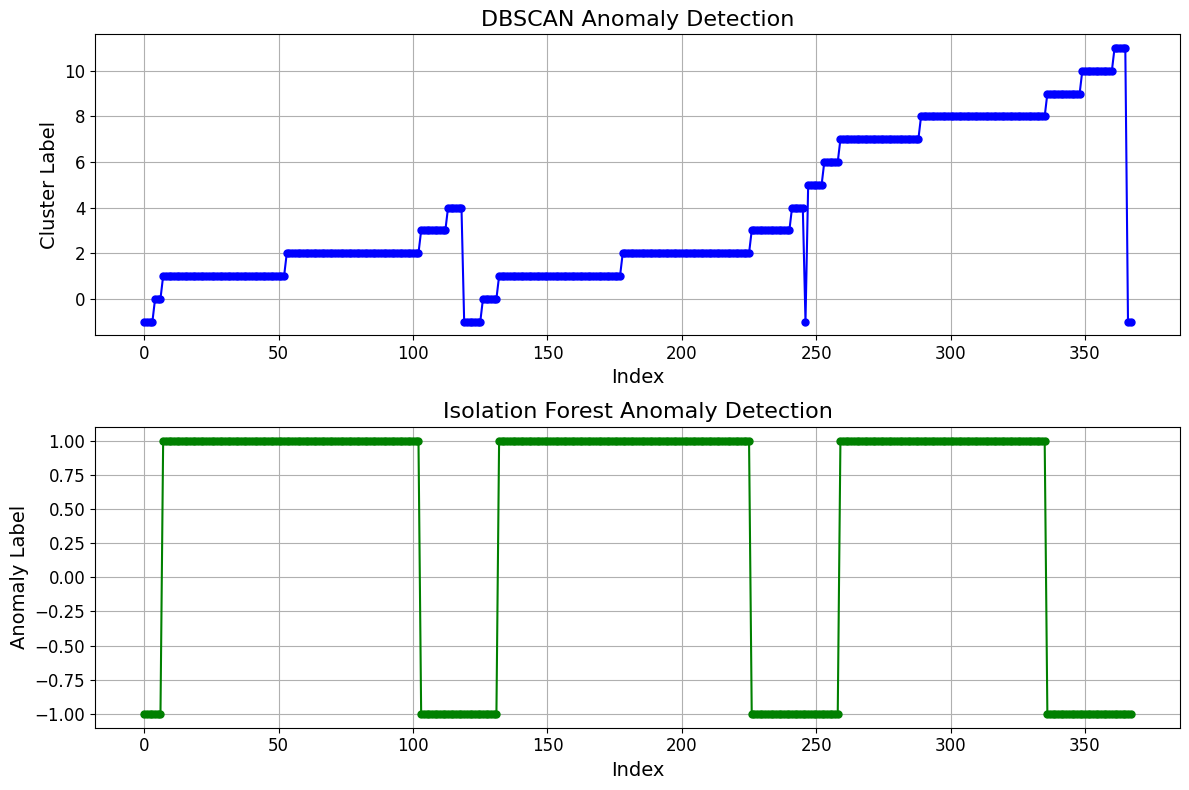

In [62]:
import matplotlib.pyplot as plt

# Create a figure with a specified size
plt.figure(figsize=(12, 8))

# Plot DBSCAN labels
plt.subplot(2, 1, 1)
plt.plot(df_selected.index, clusters, marker='o', linestyle='-', color='b', markersize=5)
plt.title('DBSCAN Anomaly Detection', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Cluster Label', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot Isolation Forest labels
plt.subplot(2, 1, 2)
plt.plot(df_selected.index, iso_labels, marker='o', linestyle='-', color='g', markersize=5)
plt.title('Isolation Forest Anomaly Detection', fontsize=16)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Anomaly Label', fontsize=14)
plt.grid(True)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()


In [63]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_avg = silhouette_score(scaled_data, clusters)
print(f"Silhouette Coefficient: {silhouette_avg}")

Silhouette Coefficient: 0.7769655710507364


In [64]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Coefficient
silhouette_isolation_f = silhouette_score(scaled_data, iso_labels)
print(f"Silhouette Coefficient: {silhouette_isolation_f}")

Silhouette Coefficient: 0.3078632720182372


### **Conclusioni:**

1. Isolation Forest ha identificato ulteriori punti come anomalie che DBSCAN non ha segnalato. Ciò potrebbe indicare che IForest è più sensibile e potrebbe rilevare anomalie più sottili. Tuttavia, ciò potrebbe anche comportare più falsi positivi.

2. Entrambi gli algoritmi hanno identificato diverse anomalie comuni. Nello specifico, i punti **2021-06-26 02:00:00, 2021-06-26 07:00:00, 2021-06-27 02:00:00, 2021-06-27 07:00:00 e 2021-06-28 07:00:00** sono riconosciuti come anomalie sia da DBSCAN che da Isolation Forest.
